In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('../DataSet/cleaned_dataset/customers_cleaned.csv')
geolocation = pd.read_csv('../DataSet/cleaned_dataset/geolocation_cleaned.csv')
order_items = pd.read_csv('../DataSet/cleaned_dataset/order_items_cleaned.csv')
order_payments = pd.read_csv('../DataSet/cleaned_dataset/payments_cleaned.csv')
order_reviews = pd.read_csv('../DataSet/cleaned_dataset/reviews_cleaned.csv')
orders = pd.read_csv('../DataSet/cleaned_dataset/orders_cleaned.csv')
products = pd.read_csv('../DataSet/cleaned_dataset/products_cleaned.csv')
sellers = pd.read_csv('../DataSet/cleaned_dataset/sellers_cleaned.csv')
product_category = pd.read_csv('../DataSet/cleaned_dataset/product_category_name_cleaned.csv')

# year to year sales 

In [9]:
orders[['order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date']] = orders[[
            'order_purchase_timestamp',
            'order_approved_at',
            'order_delivered_carrier_date',
            'order_delivered_customer_date',
            'order_estimated_delivery_date'
        ]].apply(pd.to_datetime)

In [19]:
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month']=orders['order_purchase_timestamp'].dt.month_name()
orders['day']= orders['order_purchase_timestamp'].dt.day_name()


In [22]:

# Define mapping
weekday_map = {
    'Monday'   : 'Weekday',
    'Tuesday'  : 'Weekday',
    'Wednesday': 'Weekday',
    'Thursday' : 'Weekday',
    'Friday'   : 'Weekday',
    'Saturday' : 'Weekend',
    'Sunday'   : 'Weekend'
}

# Apply mapping
orders['day_type'] = orders['day'].map(weekday_map)

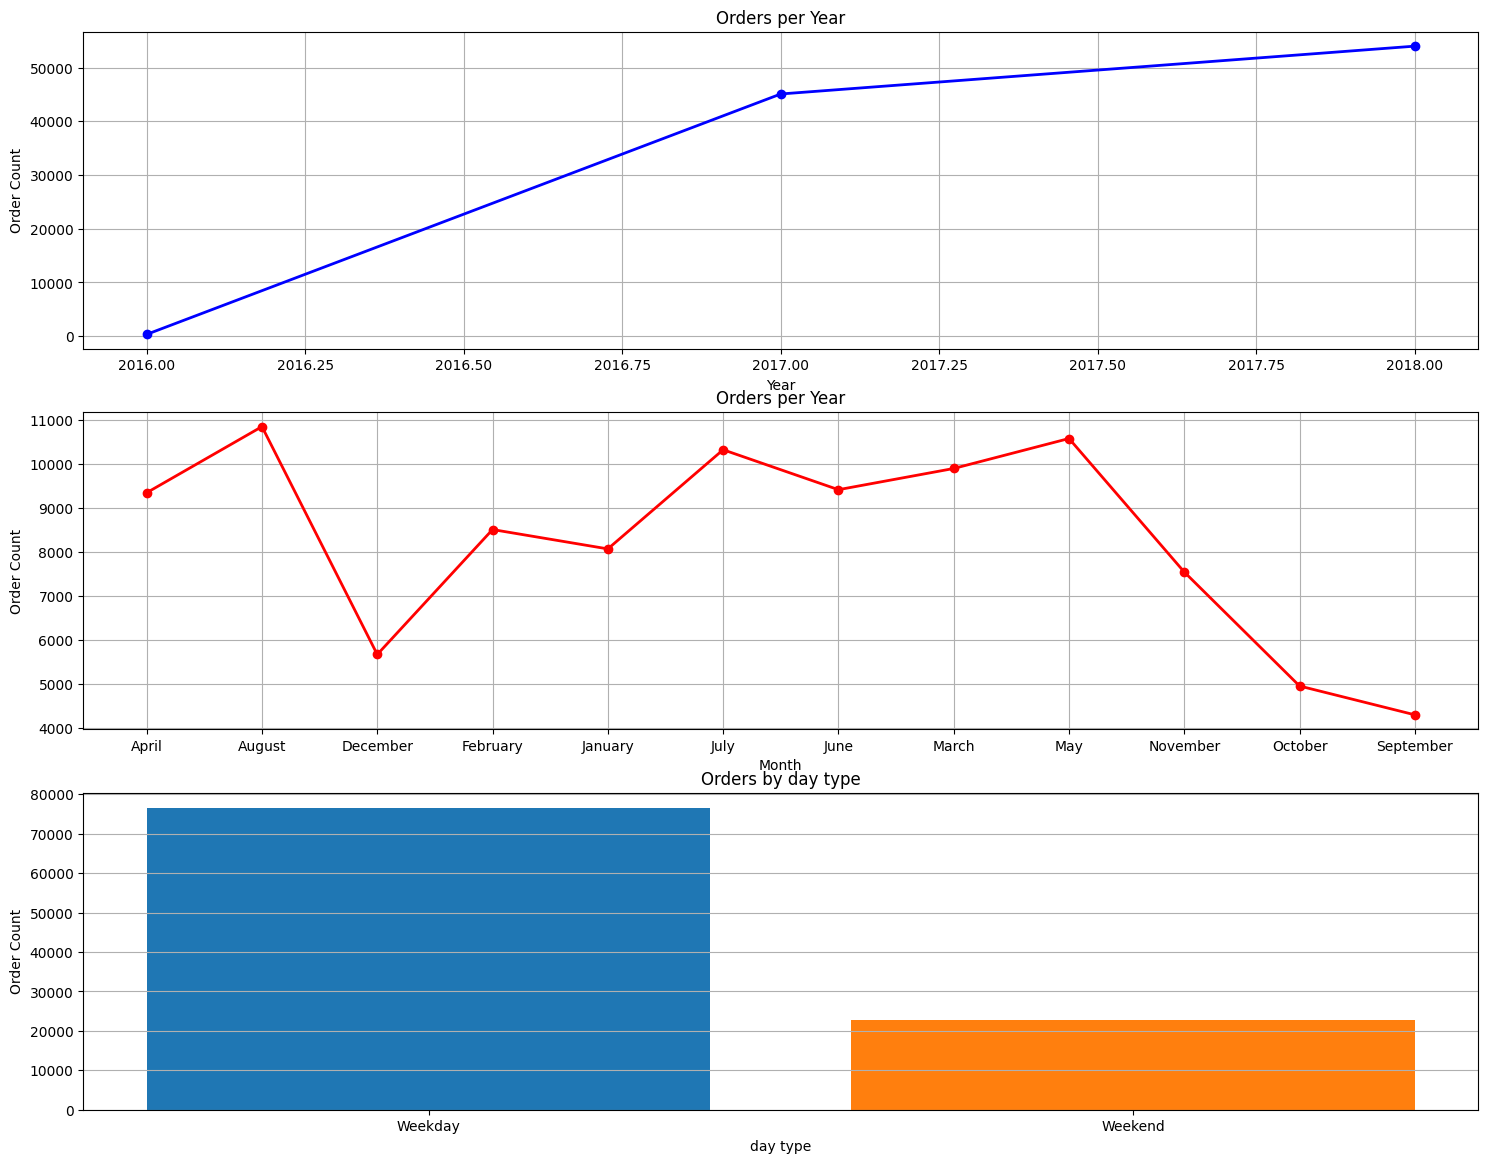

In [35]:
orders_per_year  = orders.groupby('year')['order_id'].count().reset_index()
orders_per_month = orders.groupby('month')['order_id'].count().reset_index()
orders_per_day   = orders.groupby('day_type')['order_id'].count().reset_index()

fig, axes = plt.subplots(3, 1, figsize=(18,14))
axes[0].plot(orders_per_year['year'], orders_per_year['order_id'], marker='o', color='blue', linewidth=2)
axes[0].set_title('Orders per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Order Count')
axes[0].grid(True)

axes[1].plot(orders_per_month['month'], orders_per_month['order_id'], marker='o', color='red', linewidth=2)
axes[1].set_title('Orders per Year')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Order Count')
axes[1].grid(True)

axes[2].bar(orders_per_day['day_type'], orders_per_day['order_id'], color=['#1f77b4','#ff7f0e'])
axes[2].set_title('Orders by day type')
axes[2].set_xlabel('day type')
axes[2].set_ylabel('Order Count')
axes[2].grid(axis='y')




